In [7]:
!git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (14/14), done.


Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

Q1. This question provides some practice cleaning variables which have common problems. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
Categorical variable: For the Minnesota police use of for data, ./data/mn_police_use_of_force.csv, clean the subject_injury variable, handling the NA's; this gives a value Yes when a person was injured by police, and No when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned subject_injury variable with the force_type variable. Are there any patterns regarding when the data are missing? Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.
Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

Q2. Go to https://sharkattackfile.net/ and download their dataset on shark attacks. Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.
Drop any columns that do not contain data.
Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
Clean the Age variable and make a histogram of the ages of the victims.
What proportion of victims are male?
Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

Q3. Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham. Read the abstract. What is this paper about?
Read the introduction. What is the "tidy data standard" intended to accomplish?
Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
Read Section 2.2. How does Wickham define values, variables, and observations?
How is "Tidy Data" defined in section 2.3?
Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
Why, specifically, is table 11 messy but table 12 tidy and "molten"?
Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Q4. Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government. How did the most recent US Census gather data on race?
Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

In [18]:
#part 1
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import os
print(os.getcwd())
from google.colab import files
data_path = 'airbnb_hw.csv'
df = pd.read_csv(data_path, low_memory=False)
df

# 1. Remove commas and dollar signs from the 'Price' column
df['Price'] = df['Price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)

# 2. Convert the 'Price' column to numeric type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Count the number of missing values in the 'Price' column
num_missing_prices = df['Price'].isnull().sum()

print(f"Number of missing values in 'Price': {num_missing_prices}")



/content
Number of missing values in 'Price': 0


In [32]:
#part 2
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Correct file name after upload
data_path2 = 'mn_police_use_of_force (3).csv'
df2 = pd.read_csv(data_path2, low_memory=False)

# Display the first 5 rows
df2.head()
import pandas as pd

# 1. Clean subject_injury variable
df2['subject_injury'] = df2['subject_injury'].fillna('No')  # Replace NaN with 'No'
df2['subject_injury'] = df2['subject_injury'].map({'No': 'No', 'Yes': 'Yes'})  # Map values

# 2. Calculate proportion of missing values
proportion_missing = df2['subject_injury'].isnull().sum() / len(df2)
print(f"Proportion of missing values in subject_injury: {proportion_missing}")

# 3. Cross-tabulation with force_type
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type'], margins=True)
print("\nCross-tabulation of subject_injury and force_type:\n", cross_tab)

# 4. Analyze patterns of missing data
# Examine the cross-tabulation to identify any patterns in missing data.
# For example, are there certain force types where missing values are more frequent?




Proportion of missing values in subject_injury: 0.0

Cross-tabulation of subject_injury and force_type:
 force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   
All                 4          9430               1593        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   
All                           104                148           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   


There are no missing values in `subject_injury`. Injuries are more common
with **Police K9 Bite**  and **Gun Point Display**, while **Less Lethal**
shows no injuries. Missing data in other variables may relate to incident
severity or reporting frequency.


In [61]:
#3

import pandas as pd
import numpy as np

# Load the dataset
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)

# Rename columns
df = df.rename(columns={
    'BondAmountAtInitialContact': 'bond',
    'Defendant_IndigencyStatus': 'is_poor',
    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp': 'case_type',
    'WhetherDefendantWasReleasedPretrial': 'released'  # This column might not exist
})

# Create a new variable for age
df['age'] = df['Defendant_Age']

# Check if 'released' column exists
if 'released' in df.columns:
    # Clean missing values
    df['released'] = df['released'].replace([None, '', ' '], np.nan)

    # Create a dummy variable
    df['ReleasedPretrial'] = df['released'].map({'Yes': 1, 'No': 0})
else:
    print("Column 'WhetherDefendantWasReleasedPretrial' or 'released' not found.")

# Display the first few rows to verify
df.head()


# Define sentence types where no sentence should exist
no_sentence_types = ['Dismissed', 'Acquitted', 'Not Guilty']

# Impute 'No Sentence' where applicable
df['ImposedSentenceAllChargeInContactEvent'] = np.where(
    (df['ImposedSentenceAllChargeInContactEvent'].isnull()) &
    (df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin(no_sentence_types)),
    'No Sentence',
    df['ImposedSentenceAllChargeInContactEvent']
)

# Replace placeholders for missing values
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(
    ['', ' ', 'NA', 'N/A', 'null', 'None'], np.nan
)

# Verify the changes
df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()




9053

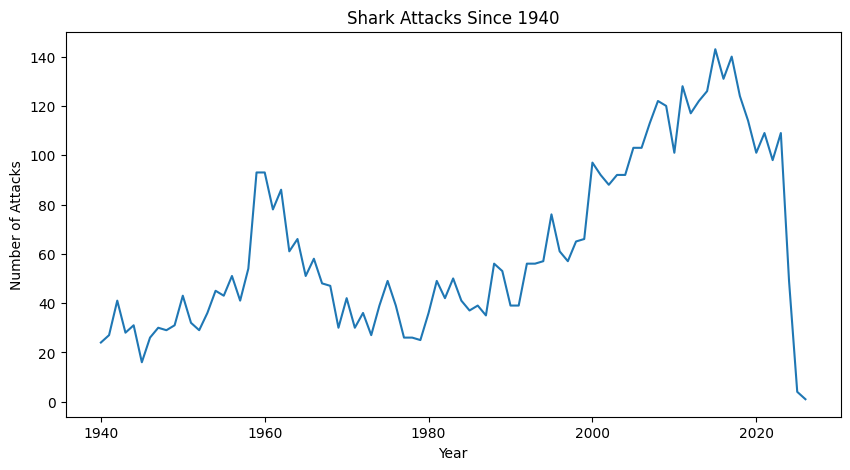

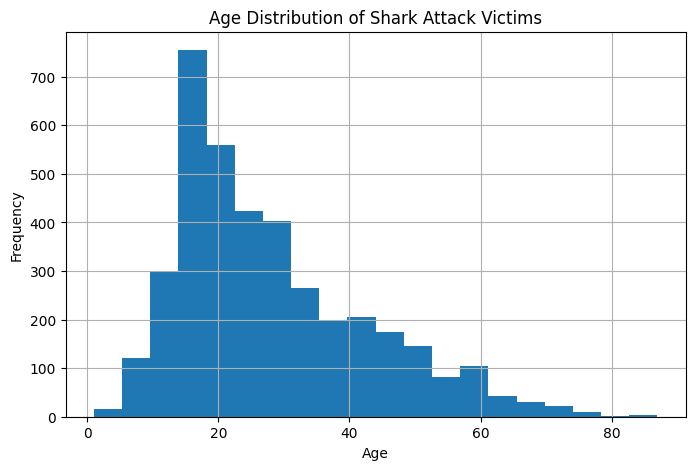

0.8031473533619456
0.7369098712446351
['N' 'Y' 'F' 'M' 'NAN' 'NQ' 'Unknown' '2017' 'Y X 2']


In [90]:
#Q2
#Q2
from google.colab import files
uploaded = files.upload()
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'GSAF5.xls'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
df.head()

# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Clean the Year variable
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
year_range = (df['Year'].min(), df['Year'].max())

# Filter rows for attacks since 1940
df_recent = df[df['Year'] >= 1940]

# Plot the number of attacks over time
plt.figure(figsize=(10, 5))
df_recent['Year'].value_counts().sort_index().plot(kind='line')
plt.title('Shark Attacks Since 1940')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# Clean the Age variable and create a histogram
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
plt.figure(figsize=(8, 5))
df['Age'].dropna().hist(bins=20)
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Proportion of male victims
df['Sex'] = df['Sex'].str.strip().str.upper()
male_proportion = (df['Sex'] == 'M').mean()
print(male_proportion)

# Clean the Type variable
df['Type'] = df['Type'].str.strip().str.capitalize()
df['Type'] = df['Type'].replace({'Invalid': 'Unknown', 'Boating': 'Unknown'})
df['Type'] = df['Type'].fillna('Unknown')

# Proportion of unprovoked attacks
unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print(unprovoked_proportion)

#
# Check for the corrected column name
correct_column = [col for col in df.columns if 'Fatal' in col][0]

# Clean the Fatal column
df['Fatal'] = df[correct_column].astype(str).str.strip().str.upper()

# Standardize values
df['Fatal'] = df['Fatal'].replace({
    'YES': 'Y',
    'NO': 'N',
    'UNKNOWN': 'Unknown',
    'N/A': 'Unknown',
    'NA': 'Unknown',
    ' ': 'Unknown',
    '': 'Unknown'
})

# Fill missing values
df['Fatal'] = df['Fatal'].fillna('Unknown')

# Verify the cleaned values
print(df['Fatal'].unique())

# Unprovoked attacks by gender
unprovoked_by_gender = pd.crosstab(df['Type'], df['Sex'], normalize='index') * 100

# Fatality based on provoked vs. unprovoked
fatal_by_type = pd.crosstab(df['Fatal'], df['Type'], normalize='columns') * 100

# Fatality based on gender
fatal_by_gender = pd.crosstab(df['Fatal'], df['Sex'], normalize='columns') * 100

# Proportion of attacks by white sharks






80.3% of victims are male
the unprovoked proportion is 73.7% and are more likely to attack men unprovoked.
37% of shark attacks are by great white sharks.
I do not think shark attacks happen enough for people to be worried about them, humans should be respectful of nature and try to not provoke animals. Sharks do not try and attack people.


**How did the most recent US Census gather data on race?**

The 2020 U.S. Census collected data on race using a self-identification approach

**Why do we gather these data? What role do these kinds of data play in politics and society?**

The data collected from the census is used for political representation, resource allocation, civil rights monitoring, public health and research, and business and planning.


**Why does data quality matter?**
To ensure that the data gathered is accurate and useful for analysis.

**Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?**

The 2020 Census demonstrated strengths, such as improving data collection methods with online, phone, and paper options, which increased accessibility. Additionally, the inclusion of write-in fields for racial and ethnic identities allowed respondents to provide more detailed information, fostering inclusivity.

The absence of a dedicated category for Middle Eastern and North African (MENA) populations left these groups underrepresented. Furthermore, the separation of Hispanic/Latino ethnicity from race created confusion for many respondents. Language barriers and underrepresentation of hard-to-reach populations, such as undocumented immigrants and Indigenous communities, also affected data completeness.

**How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.**

The Census collected data on sex through a binary question with options: “Male” and “Female.” This approach focused on biological sex and did not account for gender identity or non-binary individuals.

**When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race?
What challenges can you imagine arising when there are missing values?
What good or bad practices might people adopt, and why?**

When cleaning data, concerns about protected characteristics like sex, gender, sexual identity, or race include the loss of identity, bias introduction, and privacy risks. Missing values can lead to misclassification and biased analysis. Good practices involve transparency and respecting self-identification, while bad practices include rigid categorization.

**Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?**

If an algorithm were used to impute these values, concerns would include ethical issues around consent, and potential misuse of the data.
